In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_down_BTC1.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BTC,down,2017-09-14 21:00:00,CryptoHourly,0,0,NaN,"@#3, Bitcoin Cash with unit price of $410.92, ..."
1,BTC,down,2017-09-14 21:00:00,CryptoHourly,0,0,NaN,"@#1, Bitcoin with unit price of $3,341.57, mar..."
2,BTC,down,2017-09-14 21:00:00,DMVdevalores,0,0,NaN,"El Bitcoin (Blockchain 24-horas) vale USD 3,44..."
3,BTC,down,2017-09-14 21:00:00,howmanybigmacs,0,0,NaN,You can buy 842 Big Macs with 1 Bitcoin
4,BTC,down,2017-09-14 21:00:01,Coinbelly,0,0,#Bitcoin #Bitcoin,#Bitcoin Core 0.15.0 Is Released: Here’s What’...
...,...,...,...,...,...,...,...,...
4559,BTC,down,2017-09-14 23:59:46,xubardarch,0,2,NaN,Elinde bitcoin olmayanların tek teselli kaynağ...
4560,BTC,down,2017-09-14 23:59:46,devnullius,1,0,NaN,"Bitcoin Core project just reached 15,000 commi..."
4561,BTC,down,2017-09-14 23:59:51,allyzth,0,0,#bitcoin #bitcoin,"【ビットコイン】 308,008 ▼27.77% -118433 [08:58] https..."
4562,BTC,down,2017-09-14 23:59:57,Lydia_GQ,0,0,NaN,Hoy a las 20 hrs. de Cd. de México y Perú Webi...


In [5]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=str(x) ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [6]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [8]:
text['text']

0       [@, 3, ,, bitcoin, cash, with, unit, price, of...
1       [@, 1, ,, bitcoin, with, unit, price, of, $, 3...
2       [el, bitcoin, (, blockchain, 24, horas, ), val...
3       [you, can, buy, 842, big, macs, with, 1, bitcoin]
4       [bitcoin, core, 0.15.0, is, released, :, here,...
                              ...                        
4559    [elinde, bitcoin, olmayanların, tek, teselli, ...
4560    [bitcoin, core, project, just, reached, 15,000...
4561    [【ビットコイン】, 308,008, ▼27.77, %, 118433, [, 08:5...
4562    [hoy, a, las, 20, hrs, ., de, cd, ., de, méxic...
4563    [tom, lee, on, cnbc, :, “, our, data, shows, t...
Name: text, Length: 4564, dtype: object

In [9]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
text['text']

0       [,, bitcoin, cash, unit, price, $, ,, market, ...
1       [,, bitcoin, unit, price, $, ,, market, cap, $...
2       [el, bitcoin, (, blockchain, horas, ), vale, u...
3                               [buy, big, macs, bitcoin]
4       [bitcoin, core, released, :, ’, ’, new, articl...
                              ...                        
4559    [elinde, bitcoin, tek, teselli, kaynağı, :, ),...
4560    [bitcoin, core, project, reached, commits, ., ...
4561            [%, [, ], bitcoin, bitcoin, ビットコイン, 仮想通貨]
4562    [hoy, las, hrs, ., cd, ., de, méxico, perú, we...
4563    [tom, lee, cnbc, :, “, data, shows, holders, $...
Name: text, Length: 4564, dtype: object

In [14]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [19]:
# text['text'] =  text['text'].apply(lambda x : [re.sub('[^a-zA-Z0-9]',' ',word).strip() for word in x])

In [20]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [21]:
article_contents = tokenized_doc.values.tolist()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [23]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [24]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [25]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [26]:
word2id = defaultdict(lambda: 0)

In [27]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [28]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [29]:
len(tf_idf_result)

6598

In [30]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

6598


In [31]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [32]:
sentences = article_contents

In [33]:
from gensim.models import Word2Vec

In [34]:
model = Word2Vec(sentences, min_count=1)

In [35]:
len(model.wv.vocab)

6598

In [36]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [37]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [38]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [39]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [40]:
temp_cluster_result['cluster'] = assigned_clusters

In [41]:
temp_cluster_result['raw_data'] = X.tolist()

In [42]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [43]:
from sklearn.metrics import pairwise_distances

In [44]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [45]:
len(cosine_centroid_list)

6598

In [46]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [47]:
sum(temp_distance[3])

305.63205630570656

In [48]:
import scipy.spatial.distance as dist

In [49]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0001535744824383567

In [50]:
dist.euclidean(X[0],cosine_centroid_list[0])

7.303810957353379

In [51]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [52]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [53]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[-0.22887808084487915, 0.31696972250938416, -0...",bitcoin,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000154,0.963879,0.036275,NaN
116,"[-0.10712853074073792, 0.15812994539737701, -0...",news,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000162,0.060693,0.939469,NaN
122,"[-0.10487395524978638, 0.13981260359287262, -0...",crypto,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000117,0.058758,0.941359,NaN
98,"[-0.09818164259195328, 0.12149583548307419, -0...",cryptocurrency,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000132,0.056119,0.944013,NaN
5,"[-0.12138383090496063, 0.16991770267486572, -0...",blockchain,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000062,0.047851,0.952211,NaN
224,"[-0.05840892717242241, 0.09066526591777802, -0...",bank,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.008058,0.051193,0.956865,NaN
40,"[-0.08748716115951538, 0.11496112495660782, -0...",ethereum,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000158,0.031314,0.968843,NaN
4,"[-0.08882986754179001, 0.12199351191520691, -0...",market,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000242,0.028148,0.972094,NaN
290,"[-0.0758787989616394, 0.1077738031744957, -0.2...",currency,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000403,0.025157,0.975246,NaN
260,"[-0.0740511417388916, 0.1078438013792038, -0.1...",free,0,"[-0.0072839265, 0.010134806, -0.01755365, -0.0...",0.000345,0.024629,0.975716,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
163,"[-0.11249988526105881, 0.1575886458158493, -0....",china,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.000369,0.095174,0.905195,NaN
93,"[-0.11197677999734879, 0.13904310762882233, -0...",exchange,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.000474,0.081804,0.918670,NaN
3,"[-0.0830845907330513, 0.10077068209648132, -0....",price,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.000890,0.076350,0.924540,NaN
60,"[-0.11195407062768936, 0.12850713729858398, -0...",trade,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.000320,0.069137,0.931183,NaN
187,"[-0.08007179945707321, 0.0879543125629425, -0....",week,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.002234,0.036064,0.966169,NaN
168,"[-0.04954243823885918, 0.04175899177789688, -0...",crash,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.002133,0.029907,0.972226,NaN
126,"[-0.08520571142435074, 0.09232264012098312, -0...",chinese,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.000645,0.027796,0.972849,NaN
381,"[-0.06061170995235443, 0.07772967219352722, -0...",stop,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.001087,0.021990,0.979096,NaN
138,"[-0.04872233793139458, 0.06787209212779999, -0...",fall,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.000619,0.017416,0.983202,NaN
13,"[-0.0769340991973877, 0.09140850603580475, -0....",article,1,"[-0.0037150504, 0.0045495387, -0.0071032243, -...",0.000448,0.014777,0.985671,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
170,"[0.003641309682279825, -0.00078733911504969, -...",bitcoinbabe,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.382689,0.000176,1.382514,NaN
4011,"[-0.0009440099820494652, -0.002851136960089206...",notso,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.398565,0.000176,1.398389,NaN
3488,"[-0.00010173790360568091, 0.000503878924064338...",even,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.440902,0.000176,1.440726,NaN
1744,"[0.0024729908909648657, -0.0030694955494254827...",the_worlds_oldest_bitcoin_exchange_is_shutting...,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.464881,0.000176,1.464705,NaN
3979,"[0.0036111613735556602, -0.003494566073641181,...",interview,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.477360,0.000352,1.477009,NaN
4585,"[-0.0036794375628232956, 0.003184461733326316,...",desplomando,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.485847,0.000176,1.485671,NaN
48,"[0.004181790165603161, 0.005129234865307808, -...",prisled,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.492502,0.000352,1.492150,NaN
4393,"[-0.0019156348425894976, -0.001753053395077586...",repost,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.494489,0.000528,1.493961,NaN
5763,"[-0.0026879864744842052, -0.002100582700222730...",legacy,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.506727,0.000176,1.506551,NaN
6354,"[-0.0048935292288661, 0.0005601543816737831, -...",assurance,2,"[0.0007118029, -0.0003938082, -0.00095801905, ...",0.511850,0.000176,1.511674,NaN


In [56]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4319,"[0.007605021819472313, -0.0042989784851670265,...",gbp_stream,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.021195,0.000352,1.020843,NaN
4737,"[0.0006340641994029284, -0.0014470260357484221...",executive,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.033412,0.000528,1.032885,NaN
1864,"[0.007322742138057947, -0.002112378366291523, ...",usd_stream,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.036253,0.000352,1.035901,NaN
1862,"[0.0030531673692166805, -0.006613271776586771,...",winkdex,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.042722,0.001056,1.041666,NaN
2739,"[-0.001727985916659236, -0.0009821129497140646...",slippening,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.085824,0.000704,1.085120,NaN
1063,"[0.004759578965604305, -0.002579127438366413, ...",bpomc,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.098418,0.000352,1.098066,NaN
5162,"[-0.0017002980457618833, -0.001906164456158876...",buymore,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.106449,0.000176,1.106273,NaN
691,"[0.003698457032442093, -0.00474120257422328, 0...",determine,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.122351,0.000528,1.121823,NaN
6135,"[0.0023387246765196323, 0.0023753384593874216,...",以上の下落ばかり,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.131196,0.000176,1.131020,NaN
2769,"[0.002448235871270299, -0.00318604102358222, 0...",sei_blog,3,"[0.0006940496, -0.0010555707, 0.0018640972, 0....",0.138787,0.000352,1.138435,NaN


In [57]:
y_km = temp_cluster_result['cluster'].values

In [58]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

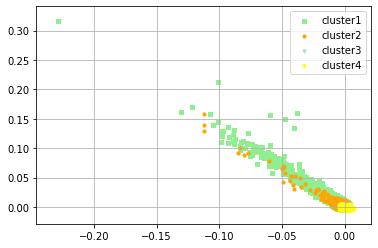

In [59]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 투자

4748

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 부정

1613

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기타

104

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 이슈

133

In [64]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 11 # 투자

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 2 # 부정

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 13 # 기타

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 5 # 이슈

In [69]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [70]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [71]:
kmeans.inertia_

114.85684204101562

In [72]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 1 0 ... 0 0 0]


In [73]:
cluster_values= list(model.wv.vocab)

In [74]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-114.85684204101562


In [75]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [76]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.72447723


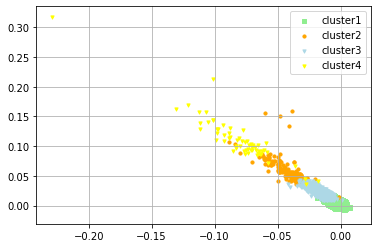

In [77]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [78]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [79]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [80]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [81]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [82]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [83]:
import scipy.spatial.distance as dist

In [84]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [85]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1519,"[-0.007162824273109436, 0.00062787183560431, -...",apuestas,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.025186,0.000176,1.025010,NaN
4989,"[-0.006565960124135017, 0.007263121195137501, ...",recuou,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.025825,0.000352,1.025473,NaN
870,"[0.0018180740298703313, 0.008942333050072193, ...",reunite,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.025899,0.000176,1.025723,NaN
589,"[-0.0026982331182807684, 0.006301012821495533,...",kazanirsin,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.026182,0.000176,1.026006,NaN
3095,"[-0.006321686785668135, 0.007113220635801554, ...",d'euros,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.026614,0.000528,1.026086,NaN
4143,"[-0.005217746365815401, 0.00481623038649559, -...",supplier,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.026342,0.000176,1.026166,NaN
1933,"[-0.005315244197845459, 0.00023738484014756978...",weather,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.026365,0.000176,1.026189,NaN
4764,"[-0.0015134431887418032, 0.0006382964784279466...",mcdonalds,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.026377,0.000176,1.026201,NaN
4623,"[-0.00586688332259655, 0.004799503367394209, -...",arada,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.026378,0.000176,1.026202,NaN
2500,"[-0.005265465937554836, 0.005358177237212658, ...",kaiser,0,"[-0.0030798519, 0.0041828346, -0.0072172177, -...",0.026415,0.000176,1.026239,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
239,"[-0.040713436901569366, 0.05630285665392876, -...",game,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.028747,0.004750,1.023997,NaN
79,"[-0.040639959275722504, 0.052136149257421494, ...",btcusd,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.032813,0.005981,1.026831,NaN
2149,"[-0.03812408447265625, 0.05196960270404816, -0...",miner,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.036422,0.004222,1.032200,NaN
11,"[-0.044378459453582764, 0.060106150805950165, ...",core,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.043014,0.007565,1.035450,NaN
511,"[-0.04072985425591469, 0.053283631801605225, -...",financial,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.045516,0.004046,1.041470,NaN
759,"[-0.04056733846664429, 0.0551944337785244, -0....",launch,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.050039,0.005454,1.044585,NaN
1516,"[-0.043959349393844604, 0.05000681057572365, -...",lookrev,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.051482,0.005278,1.046204,NaN
852,"[-0.03987644612789154, 0.0555369071662426, -0....",post,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.054598,0.006685,1.047913,NaN
911,"[-0.03746722638607025, 0.052218928933143616, -...",power,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.054893,0.004222,1.050671,NaN
1871,"[-0.04869664087891579, 0.05624930188059807, -0...",bitcoinwallet,1,"[-0.04136122, 0.058076177, -0.09464903, -0.188...",0.058157,0.006861,1.051296,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
82,"[-0.013203777372837067, 0.01942945085465908, -...",opportunity,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.028463,0.002463,1.026000,NaN
1678,"[-0.017506515607237816, 0.017792632803320885, ...",tulip,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.029255,0.001935,1.027320,NaN
1837,"[-0.019135650247335434, 0.02348952367901802, -...",relay_rts,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.028743,0.001231,1.027511,NaN
1023,"[-0.019460471346974373, 0.02212262898683548, -...",drug,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.029500,0.001935,1.027565,NaN
1278,"[-0.012277135625481606, 0.02412070706486702, -...",easy,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.030160,0.002287,1.027873,NaN
1313,"[-0.016855604946613312, 0.018875909969210625, ...",afraid,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.029709,0.001759,1.027950,NaN
4617,"[-0.016324413940310478, 0.023223616182804108, ...",değil,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.028711,0.000704,1.028007,NaN
1381,"[-0.012635357677936554, 0.02350510098040104, -...",mismo,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.029400,0.001056,1.028344,NaN
3420,"[-0.015802400186657906, 0.024734335020184517, ...",asia,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.030704,0.002287,1.028417,NaN
72,"[-0.017225349321961403, 0.024212105199694633, ...",acesse,2,"[-0.016164176, 0.021970673, -0.037715003, -0.0...",0.029566,0.001056,1.028511,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
290,"[-0.0758787989616394, 0.1077738031744957, -0.2...",currency,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.083654,0.025157,1.058497,NaN
4,"[-0.08882986754179001, 0.12199351191520691, -0...",market,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.095860,0.028148,1.067712,NaN
40,"[-0.08748716115951538, 0.11496112495660782, -0...",ethereum,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.115619,0.031314,1.084305,NaN
645,"[-0.08866075426340103, 0.11289941519498825, -0...",korea,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.111156,0.012842,1.098314,NaN
345,"[-0.09252945333719254, 0.11957354843616486, -0...",think,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.134462,0.012666,1.121796,NaN
260,"[-0.0740511417388916, 0.1078438013792038, -0.1...",free,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.170258,0.024629,1.145629,NaN
523,"[-0.08076337724924088, 0.11289694160223007, -0...",sell,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.194027,0.013898,1.180129,NaN
178,"[-0.0977540910243988, 0.12856410443782806, -0....",value,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.205330,0.016009,1.189321,NaN
404,"[-0.07790682464838028, 0.10859759151935577, -0...",morgan,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.252612,0.011611,1.241001,NaN
209,"[-0.08331610262393951, 0.09646926075220108, -0...",jamie,3,"[-0.08145815, 0.11157474, -0.19858153, -0.3842...",0.267061,0.019527,1.247534,NaN


In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #이슈

5692

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #비즈

172

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #긍정

674

In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #거래소

60

In [94]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈 

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 7 # 비즈

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 2 # 긍정

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 12 # 거래소

In [99]:
temp_cluster_result1['Silhouette'] = 0.72447723
temp_cluster_result['Silhouette'] = 0.72447723
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [100]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_BTC1_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_BTC1_cosine")